# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission, if necessary. Sections that begin with **'Implementation'** in the header indicate where you should begin your implementation for your project. Note that some sections of implementation are optional, and will be marked with **'Optional'** in the header.

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---

## Step 1: Dataset Exploration

Visualize the German Traffic Signs Dataset. This is open ended, some suggestions include: plotting traffic signs images, plotting the count of each sign, etc. Be creative!


The pickled data is a dictionary with 4 key/value pairs:

- features -> the images pixel values, (width, height, channels)
- labels -> the label of the traffic sign
- sizes -> the original width and height of the image, (width, height)
- coords -> coordinates of a bounding box around the sign in the image, (x1, y1, x2, y2). Based the original image (not the resized version).

In [1]:
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow
print(cv2.__version__)
import time

3.1.0


In [2]:
"""Load pickled data"""
import pickle

training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [3]:
"""To start off let's do a basic data summary."""

print('X_train shape = ', X_train.shape)
print('y_train shape = ', y_train.shape)
print('X_test shape = ', X_test.shape)
print('y_test shape = ', y_test.shape)
print("Type of X_train = ", type(X_train))
print("Type of y_train = ", type(y_train))

labels = {}
for el in y_train:
    if el in labels.keys():
        labels[el] += 1
    else:
        labels[el] = 1
        
print(labels.keys())
print(len(labels.keys()))

# TODO: number of training examples
n_train = len(y_train)

# TODO: number of testing examples
n_test = len(y_test)

# TODO: what's the shape of an image?
single_image = X_train[0][:][:][:]
image_shape = single_image.shape

# TODO: how many classes are in the dataset
n_classes = len(labels.keys())

print(' ')

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

X_train shape =  (39209, 32, 32, 3)
y_train shape =  (39209,)
X_test shape =  (12630, 32, 32, 3)
y_test shape =  (12630,)
Type of X_train =  <class 'numpy.ndarray'>
Type of y_train =  <class 'numpy.ndarray'>
dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42])
43
 
Number of training examples = 39209
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


In [4]:
### Data exploration visualization goes here.
### Feel free to use as many code cells as needed.

In [5]:
"""Helper functions for data categorization and exploration"""

def make_class_dict(y):
    class_dict = {}
    num_el = len(y)
    for i in range(num_el):
        curr_class = y[i]
        if curr_class not in class_dict.keys():
            class_dict[curr_class] = [i]
        else:
            pos_index = class_dict[curr_class]
            pos_index.append(i)
            class_dict[curr_class] = pos_index
    return class_dict


import random
def plot_random(X, class_dict):
    for curr_class in class_dict.keys():
        pos_index = class_dict[curr_class]
        len_index = len(pos_index)
        i1 = random.randrange(len_index)
        i2 = random.randrange(len_index)
        i3 = random.randrange(len_index)
        print('Current class = ' + str(curr_class))
        index1 = pos_index[i1]
        index2 = pos_index[i2]
        index3 = pos_index[i3]
        im1 = X[index1][:][:][:]
        im2 = X[index2][:][:][:]
        im3 = X[index3][:][:][:]
        plt.figure()
        plt.subplot(131)
        plt.imshow(im1)
        plt.subplot(132)
        plt.imshow(im2)
        plt.subplot(133)
        plt.imshow(im3)
        plt.show() 
    plt.close("all")
    


Current class = 0


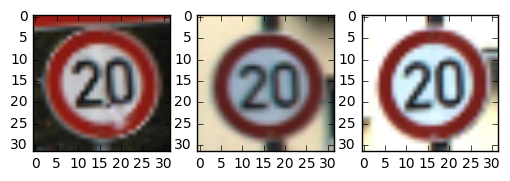

Current class = 1


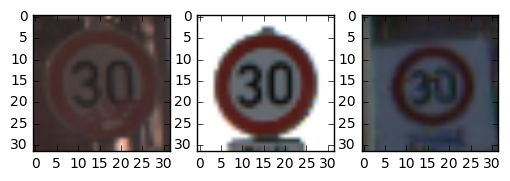

Current class = 2


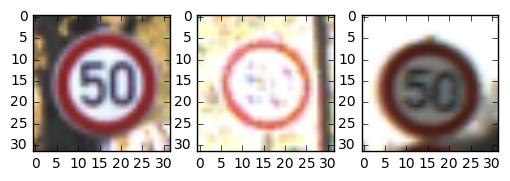

Current class = 3


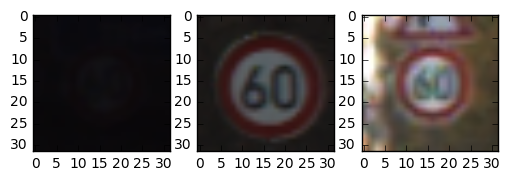

Current class = 4


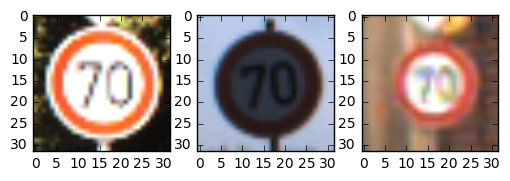

Current class = 5


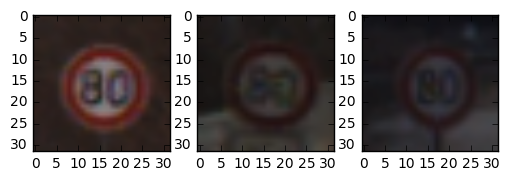

Current class = 6


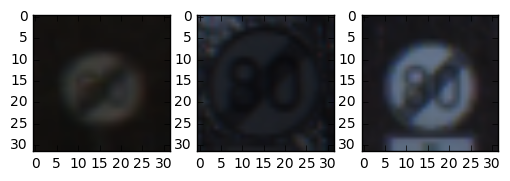

Current class = 7


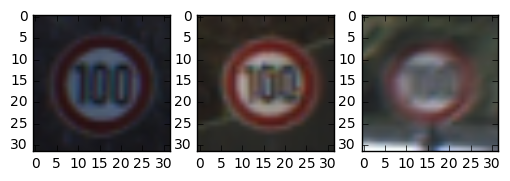

Current class = 8


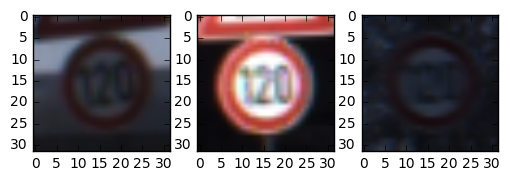

Current class = 9


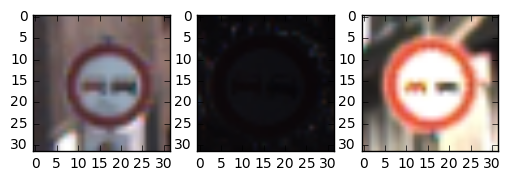

Current class = 10


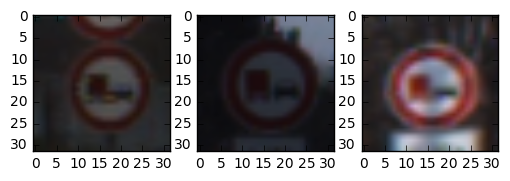

Current class = 11


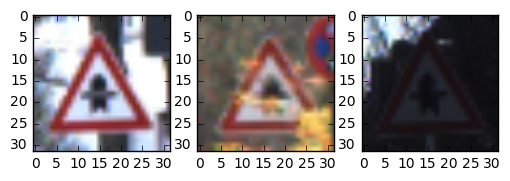

Current class = 12


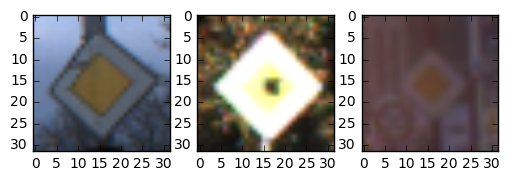

Current class = 13


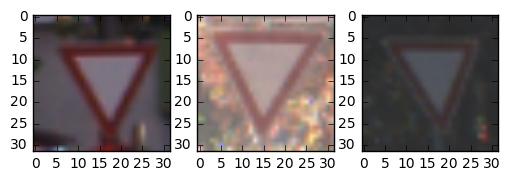

Current class = 14


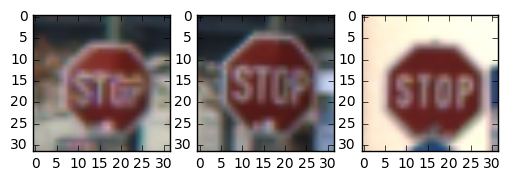

Current class = 15


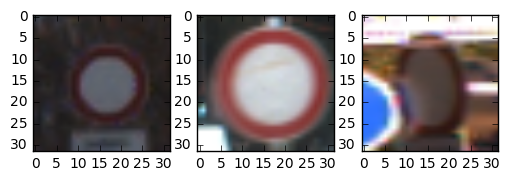

Current class = 16


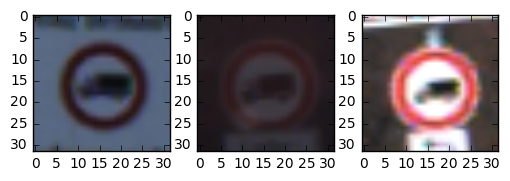

Current class = 17


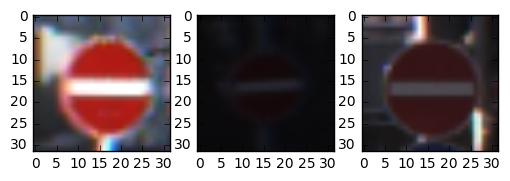

Current class = 18


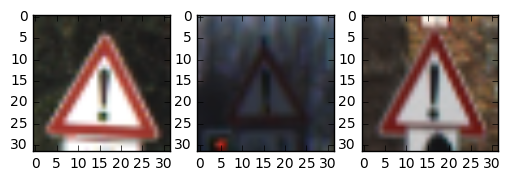

Current class = 19


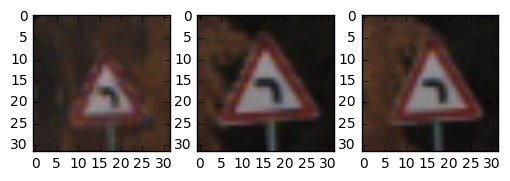

Current class = 20


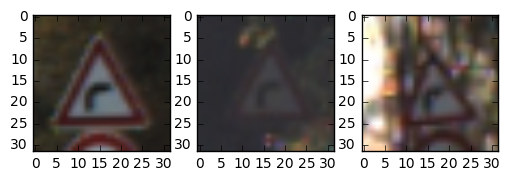

Current class = 21


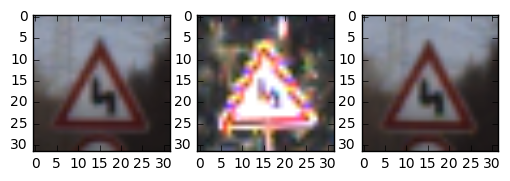

Current class = 22


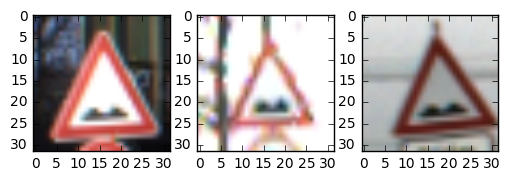

Current class = 23


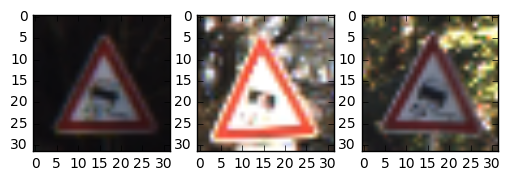

Current class = 24


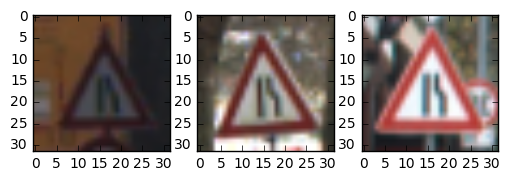

Current class = 25


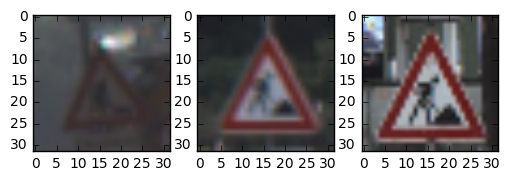

Current class = 26


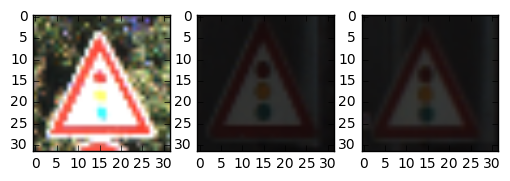

Current class = 27


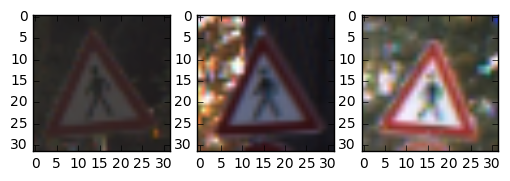

Current class = 28


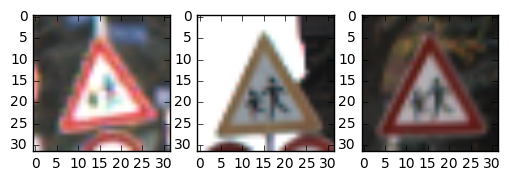

Current class = 29


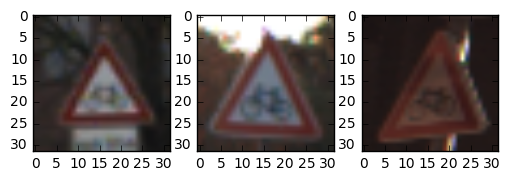

Current class = 30


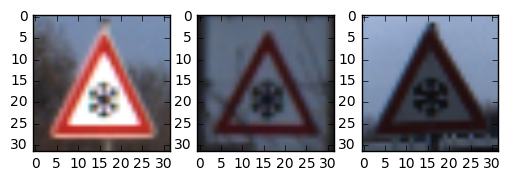

Current class = 31


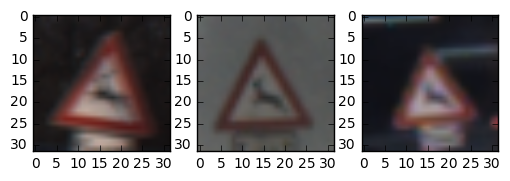

Current class = 32


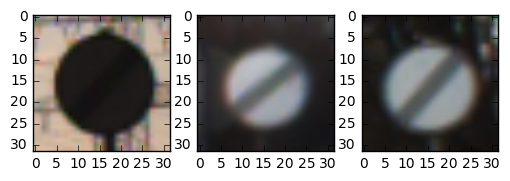

Current class = 33


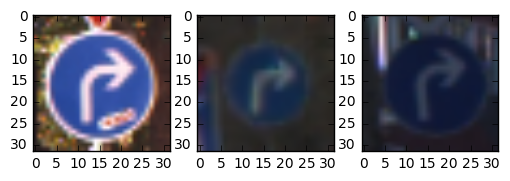

Current class = 34


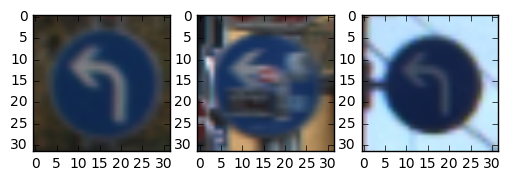

Current class = 35


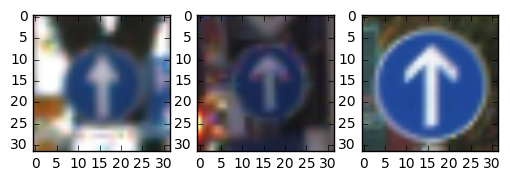

Current class = 36


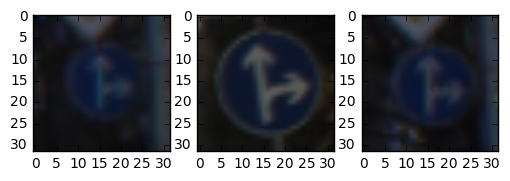

Current class = 37


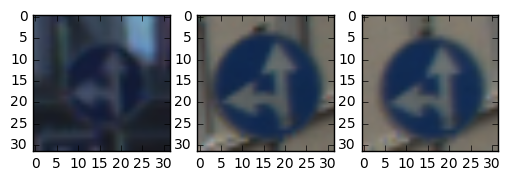

Current class = 38


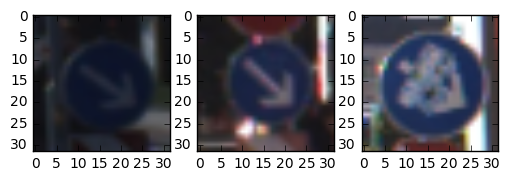

Current class = 39


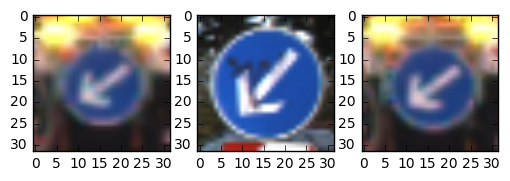

Current class = 40


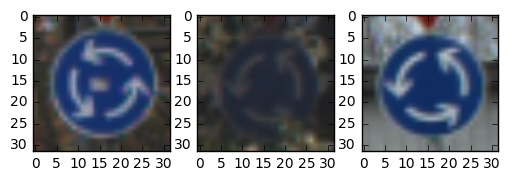

Current class = 41


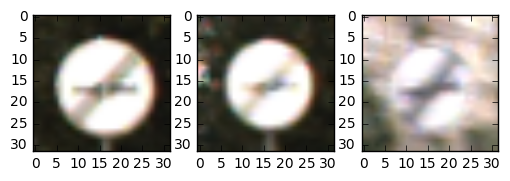

Current class = 42


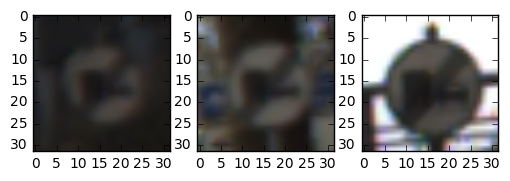

In [6]:
"""Organize images and display random ones from each class"""

class_dict_train = make_class_dict(y_train)
class_dict_test = make_class_dict(y_test)

plot_random(X_train, class_dict_train)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

There are various aspects to consider when thinking about this problem:

- Your model can be derived from a deep feedforward net or a deep convolutional network.
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

### Preprocess data

In [7]:
### Preprocess the data here.
### Feel free to use as many code cells as needed.

In [62]:
%reset -f
#tf.reset_default_graph()


"""Import modules"""
import jupyter
import numpy as np
import cv2
import matplotlib.pyplot as plt
import scipy
import sklearn
import tensorflow as tf
import math
import random
import time
import math
import random
import pickle
import os



In [63]:
"""Define helper functions for pre-processing"""

def make_gaussian_blur(x, kernel_size):
    print('Making gaussian blur')
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = gaussian_blur(curr_im, kernel_size)
    return ret_images

def crop_to_ROI(x, vertices):
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = get_ROI(curr_im, vertices)
    return ret_images

def normalize(x):
    print('Normalizing data')
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        empty_im = np.ones((x_shape[1],x_shape[2]))
        proc_im = cv2.normalize(curr_im, empty_im, -127,128,cv2.NORM_MINMAX)
        ret_images[i][:][:] = proc_im
    return ret_images

def grayscale(img):
    """Applies the Grayscale transform
    This will return an image with only one color channel
    but NOTE: to see the returned image as grayscale
    you should call plt.imshow(gray, cmap='gray')"""
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)

def make_grayscale(x):
    x_shape = x.shape
    #print(x_shape)
    num_el = x_shape[0]
    ret_images = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    #print(ret_images.shape)
    for i in range(num_el):
        curr_im = x[i][:][:][:]
        ret_images[i][:][:] = grayscale(curr_im)
    return ret_images

def randomize_set(x,y):
    numel = len(y)
    #print(type(x), type(y))
    #print(x.shape, y.shape)
    listicle = [[i] for i in range(numel)]
    random.shuffle(listicle)
    x_shape = x.shape
    y_shape = y.shape
    ret_x = np.ones((x_shape[0],x_shape[1],x_shape[2]))
    ret_y = np.ones((x_shape[0]))
    #print(ret_x.shape, ret_y.shape)
    for i in range(numel):
        index = listicle[i]
        curr_x = x[index,:,:]
        curr_y = y[index]
        ret_x[i,:,:] = curr_x
        ret_y[i] = curr_y
        #print(index)
    return(ret_x,ret_y)

def make_one_hot_encoding(y, num_labels):
    print('Making one hot encoding')
    y_shape = y.shape
    numel = y_shape[0]
    ret_y = np.zeros((numel, num_labels))
    for i in range(numel):
        curr_label = y[i]
        #print('Current label = ', curr_label)
        curr_encoding = np.zeros(num_labels)
        for j in range(num_labels):
            if j == int(curr_label):
                #print('Match!', j, curr_label)
                curr_encoding[j] = 1.0
        #print('Print one-hot encoding of label = ', curr_encoding)
        ret_y[i] = curr_encoding
    return ret_y

def expand_x(x):
    shape_x = x.shape
    #print('Length is = ', len(shape_x))
    if len(shape_x) == 3:
        print('Expanding dataset to [num el, row, col, 1]')
        ret_x = np.empty((shape_x[0],shape_x[1],shape_x[2],1))
        ret_x[:,:,:,0] = x
        #print(ret_x.shape)
        #print('Example value = ', ret_x[0,0,0,0])
    return(ret_x)

In [64]:
"""Load and preprocess data"""

# TODO: fill this in based on where you saved the training and testing data
training_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/train.p'
testing_file = '/Users/blakejacquot/Dropbox/MOOCs/Udacity_SelfDrivingCar/Term1/TrafficSignClassifier/traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
    with open(testing_file, mode='rb') as f:
        test = pickle.load(f)

X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

"""Preprocess datasets"""
X_test_preproc = X_test
X_test_preproc = make_grayscale(X_test_preproc)
X_test_preproc = make_gaussian_blur(X_test_preproc, 1)
X_test_preproc = normalize(X_test_preproc)
[X_test_shuff, y_test_shuff] = randomize_set(X_test_preproc, y_test)
y_shuff_onehot_test = make_one_hot_encoding(y_test_shuff, 43)
test_data = expand_x(X_test_shuff)
test_labels = y_shuff_onehot_test

X_train_preproc = X_train
X_train_preproc = make_grayscale(X_train_preproc)
X_train_preproc = make_gaussian_blur(X_train_preproc, 1)
X_train_preproc = normalize(X_train_preproc)
[X_train_shuff, y_train_shuff] = randomize_set(X_train_preproc, y_train)
y_shuff_onehot_train = make_one_hot_encoding(y_train_shuff, 43)
training_data = expand_x(X_train_shuff)
training_labels = y_shuff_onehot_train
total_samples = len(training_labels)

"""Print data info"""
print(' ')
print('Data info')
print('Shape of training labels = ', training_labels.shape)
print('Shape of training data = ', training_data.shape)
print('Shape of test labels = ', test_labels.shape)
print('Shape of test data = ', test_data.shape)


Making gaussian blur
Normalizing data
Making one hot encoding
Expanding dataset to [num el, row, col, 1]
Making gaussian blur
Normalizing data
Making one hot encoding
Expanding dataset to [num el, row, col, 1]
 
Data info
Shape of training labels =  (39209, 43)
Shape of training data =  (39209, 32, 32, 1)
Shape of test labels =  (12630, 43)
Shape of test data =  (12630, 32, 32, 1)


In [65]:
i = 11
print(y_train_shuff[i],y_shuff_onehot_train[i])
print(y_test_shuff[i],y_shuff_onehot_test[i])

2.0 [ 0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
11.0 [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


Plotting images and classes from randomized test set
Current index = 12359
Current image shape =  (32, 32)
Current class in decimal = 11.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


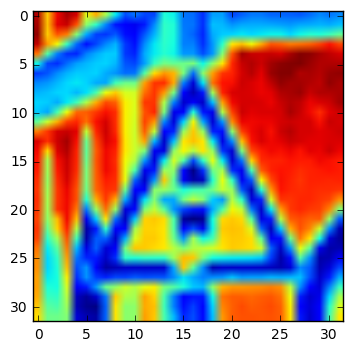

 
Current index = 9385
Current image shape =  (32, 32)
Current class in decimal = 13.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


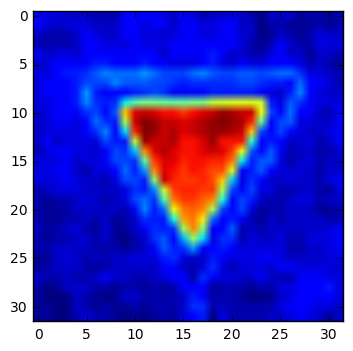

 
Current index = 1501
Current image shape =  (32, 32)
Current class in decimal = 5.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]


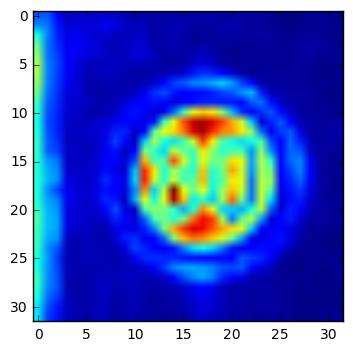

 
************************************************
Plotting images and classes from randomized training set
Current index = 37477
Current image shape =  (32, 32)
Current class in decimal = 32.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
 


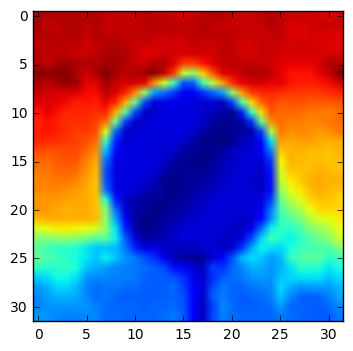

Current index = 17258
Current image shape =  (32, 32)
Current class in decimal = 12.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
 


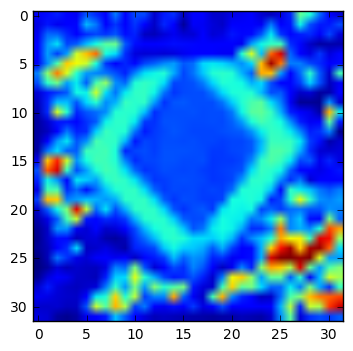

Current index = 27271
Current image shape =  (32, 32)
Current class in decimal = 14.0
Current class one hot encoded = [ 0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  1.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.]
 


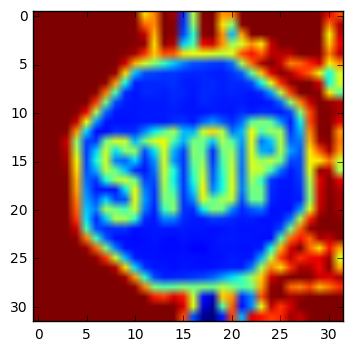

In [66]:
"""Examine pre-processed data"""

print('Plotting images and classes from randomized test set')
numel = len(test_labels)
for i in range(3):
    curr_index = random.randrange(numel)
    curr_im = test_data[curr_index,:,:,0]
    curr_class_int = y_test_shuff[curr_index]
    curr_class_onehot = y_shuff_onehot_test[curr_index]
    
    print('Current index = ' + str(curr_index))
    print('Current image shape = ', curr_im.shape)
    print('Current class in decimal = ' + str(curr_class_int))
    print('Current class one hot encoded = ' + str(curr_class_onehot))
    
    plt.figure()    
    plt.imshow(curr_im)
    plt.show()     
    print(' ')
plt.close("all")    
    
print('************************************************')
    
print('Plotting images and classes from randomized training set')
numel = len(training_labels)
for i in range(3):
    curr_index = random.randrange(numel)
    curr_im = training_data[curr_index,:,:,0]
    curr_class_int = y_train_shuff[curr_index]
    curr_class_onehot = y_shuff_onehot_train[curr_index]
    print('Current index = ' + str(curr_index))
    print('Current image shape = ', curr_im.shape)
    print('Current class in decimal = ' + str(curr_class_int))
    print('Current class one hot encoded = ' + str(curr_class_onehot))
    plt.figure()    
    plt.imshow(curr_im)
    print(' ')
    plt.show()     

plt.close("all")    
        
    
    
    
    

### Question 1 

_Describe the techniques used to preprocess the data._

**Answer:**

***Grayscale***: Convert from RGB to grayscale. For instance the training data went from size (12630, 32, 32, 3) to (12630, 32, 32)

***Gaussian blur***: Option. Did not use in final implementation.

***Normalization***: Since original pixel values are 0 to 256, subtract 128 from  each pixel to center values around zero.

***Randomize data***: In initial dataset, images are ordered according to type. Learning may look better if this is randomized.

***One-hot encode the data***: Self explanatory.

***Expand data dimension***: TensorFlow did not like the data in form (12630, 32, 32), so I had to expand a dimension for the color channel. The form for processing is (12630, 32, 32, 1).

### Question 2

_Describe how you set up the training, validation and testing data for your model. If you generated additional data, why?_

**Answer:**
I used a training and validation set only (in my code the validation set is called 'test'). I understand the purpose of having the formal test set is to avoid overfitting caused by learning bleeding back into the training set through the human overlord.

I did not generate additional data, though I thought about using transformations on the signs to put images in different orientations.

In [67]:
### Generate data additional (if you want to!)
### and split the data into training/validation/testing sets here.
### Feel free to use as many code cells as needed.

Note, the split happened above in the preprocessing section. I did not generate additional data and did not split into three sets.

In [68]:
### Define your architecture here.
### Feel free to use as many code cells as needed.

In [69]:
"""Helper functions for machine learning"""

def conv2d(x, W, b, strides=1):
    """
    Args:
        x
        W
        b
        strides
    Returns:
        TBD
    """
    x = tf.nn.conv2d(x, W, strides=[1, strides, strides, 1], padding='SAME')
    x = tf.nn.bias_add(x, b)
    return tf.nn.tanh(x)

def maxpool2d(x, k=2):
    """
    Args:
        x
        k
    Returns:
        TBD
    """
    return tf.nn.max_pool(
        x,
        ksize=[1, k, k, 1],
        strides=[1, k, k, 1],
        padding='SAME')

# Create model
def conv_net(x, weights, biases):
    """Make a model for the network
    Args:
        x:
        weights:
        biases:

    Returns:
        out:

    """
#0 input 1 or 3 maps of 48x48 neurons
#1 convolutional 100 maps of 46x46 neurons 3x3
#2 max pooling 100 maps of 23x23 neurons 2x2
#3 convolutional 150 maps of 20x20 neurons 4x4
#4 max pooling 150 maps of 10x10 neurons 2x2
#5 convolutional 250 maps of 8x8 neurons 3x3
#6 max pooling 250 maps of 4x4 neurons 2x2
#7 fully connected 200 neurons
#8 fully connected 43 neurons

#1 convolutional 100 maps of 46x46 neurons 3x3
#2 max pooling 100 maps of 23x23 neurons 2x2
    # Layer 1
    conv1 = conv2d(x, weights['layer_1'], biases['layer_1'])
    conv1 = maxpool2d(conv1)

#3 convolutional 150 maps of 20x20 neurons 4x4
#4 max pooling 150 maps of 10x10 neurons 2x2
    # Layer 2
    conv2 = conv2d(conv1, weights['layer_2'], biases['layer_2'])
    conv2 = maxpool2d(conv2)

#5 convolutional 250 maps of 8x8 neurons 3x3
#6 max pooling 250 maps of 4x4 neurons 2x2
    # Layer 3
    conv3 = conv2d(conv2, weights['layer_3'], biases['layer_3'])
    conv3 = maxpool2d(conv2)

#7 fully connected 200 neurons
#8 fully connected 43 neurons
    # Fully connected layer
    # Reshape conv3 output to fit fully connected layer input
    fc1 = tf.reshape(
        conv3,
        [-1, weights['fully_connected'].get_shape().as_list()[0]])
    fc1 = tf.add(
        tf.matmul(fc1, weights['fully_connected']),
        biases['fully_connected'])
    fc1 = tf.nn.tanh(fc1)

    # Output Layer - class prediction
    out = tf.add(tf.matmul(fc1, weights['out']), biases['out'])
    return out


In [70]:
"""Set model parameters"""
learning_rate = 0.001
batch_size = 128
training_epochs = 200
n_input = 1024  # Data input taps. 32 * 32 = 1024
n_classes = 43  # Total classes
layer_width = {
    'layer_1': 32,
    'layer_2': 64,
    'layer_3': 128,
    'fully_connected': 512
    }

# Store layers weight & bias
weights = {
    'layer_1': tf.Variable(tf.truncated_normal(
        [3, 3, 1, layer_width['layer_1']])),
    'layer_2': tf.Variable(tf.truncated_normal(
        [4, 4, layer_width['layer_1'], layer_width['layer_2']])),
    'layer_3': tf.Variable(tf.truncated_normal(
        [3, 3, layer_width['layer_2'], layer_width['layer_3']])),
    'fully_connected': tf.Variable(tf.truncated_normal(
        [1024, layer_width['fully_connected']])),
    'out': tf.Variable(tf.truncated_normal(
        [layer_width['fully_connected'], n_classes]))
}

biases = {
    'layer_1': tf.Variable(tf.zeros(layer_width['layer_1'])),
    'layer_2': tf.Variable(tf.zeros(layer_width['layer_2'])),
    'layer_3': tf.Variable(tf.zeros(layer_width['layer_3'])),
    'fully_connected': tf.Variable(tf.zeros(layer_width['fully_connected'])),
    'out': tf.Variable(tf.zeros(n_classes))
}

# tf Graph input
x = tf.placeholder("float", [None, 32, 32, 1])
y = tf.placeholder("float", [None, n_classes])

# Construct the model
logits = conv_net(x, weights, biases)

# Define loss and optimizer
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)\
        .minimize(cost)

# Evaluate the model
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(y, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))
    
# Initializing the variables
init = tf.initialize_all_variables()


In [71]:
saver = tf.train.Saver() # Object to save and restore variables.

In [72]:
"""Flow control used to save out intermediate states"""

# Flow control for statistics
save_stats_to_file = 1
load_stats_from_file = 1
report_stats_from_file = 1
initialize_stat_file = 0

# Flow control for training
restore_model_for_continued_work = 1
train_model = 1

# Initialize statistics variables
time_per_training_epoch = []
training_accuracy = []
cost_list = []


In [73]:
"""Initialize or load pickled file containing status data on training"""

if initialize_stat_file == 1:
    print('Saving stats to file')
    data_to_save = {'time_per_training_epoch': time_per_training_epoch, 'training_accuracy': training_accuracy, 'cost_list': cost_list}
    pickle.dump(data_to_save, open( "save.p", "wb" ))

if load_stats_from_file == 1:
    print('Loading stats from file')
    data_to_save = pickle.load(open( "save.p", "rb" ))
    time_per_training_epoch = data_to_save['time_per_training_epoch']
    training_accuracy = data_to_save['training_accuracy']
    cost_list = data_to_save['cost_list']

Loading stats from file


### Question 3

_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)  For reference on how to build a deep neural network using TensorFlow, see [Deep Neural Network in TensorFlow
](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/b516a270-8600-4f93-a0a3-20dfeabe5da6/concepts/83a3a2a2-a9bd-4b7b-95b0-eb924ab14432) from the classroom._


**Answer:**

In [74]:
### Train your model here.
### Feel free to use as many code cells as needed.

In [ ]:
# Launch the graph
with tf.Session() as sess:
    sess.run(init)

    """Restore saved model for continued work"""
    if restore_model_for_continued_work == 1:
        print('Restoring model')
        start_time_restore = time.time()
        saver = tf.train.import_meta_graph('model-checkpoint.meta')
        saver.restore(sess, 'model-checkpoint')
        all_vars = tf.trainable_variables()
        elapsed_time = time.time() - start_time_restore
        print('Time to restore model (sec) = ', int(elapsed_time))

    """Train model"""
    if train_model == 1:
        print('Training model')
        for epoch in range(training_epochs):
            print('Starting epoch = ', epoch)
            start_time_train = time.time()
            total_batch = int(total_samples/batch_size)

            # Loop over all batches
            print('Processing batches. Not yet saving.')
            for i in range(total_batch):
                batch_x = training_data[i*batch_size:i*batch_size+batch_size,:,:]
                batch_y = training_labels[i*batch_size:i*batch_size+batch_size]

                # Run optimization op (backprop) and cost op (to get loss value)
                sess.run(optimizer, feed_dict={x: batch_x, y: batch_y})

            # Display logs per epoch step
            c = sess.run(cost, feed_dict={x: batch_x, y: batch_y})

            print(type(c))

            cost_list.append(c)

            # Save model checkpoint
            print('Saving session')
            saver.save(sess, 'model-checkpoint')

            # Print info about the epoch
            elapsed_time = time.time() - start_time_train
            print('Time to process epoch (sec) = ', int(elapsed_time))
            time_per_training_epoch.append(int(elapsed_time))
            print(' ')
            print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c))

            """Test model and report accuracy"""
            print('Calculating Accuracy')
            start_time_test_report = time.time()
            ################################################################################
            ###############################################################################
            ################################################################################
            # Previously, 'logits' was defined as: logits = conv_net(x, weights, biases)
            # tf.argmax(logits, 1) is ...
            # tf.argmax(y, 1) is ...
            # tf.equal(x,y) the truth value of (x == y) element-wise.
            # correct_prediction is tensor of type 'bool'
            # tf.reduce_mean(input_tensor) computes the mean of elements across dimensions of a tensor
            
            
            # Calculate accuracy for test images
            #accuracy_val = accuracy.eval({x: test_data, y: test_labels})
            accuracy_val = sess.run(accuracy, feed_dict={x: test_data,
                                      y: test_labels
                                      })      
            print("Accuracy:", accuracy_val)
            ################################################################################
            ################################################################################
            ################################################################################

            
            elapsed_time = time.time() - start_time_test_report
            training_accuracy.append(accuracy_val)
            print('Time to test and report accuracy (sec) = ', int(elapsed_time))

            if save_stats_to_file == 1:
                print('Saving stats to file')
                data_to_save = {'time_per_training_epoch': time_per_training_epoch, 'training_accuracy': training_accuracy, 'cost_list': cost_list}
                pickle.dump(data_to_save, open( "save.p", "wb" ))

            if report_stats_from_file == 1:
                print('Reporting from file to make plot')
                data_to_save = pickle.load( open( "save.p", "rb" ) )
                time_per_training_epoch = data_to_save['time_per_training_epoch']
                training_accuracy = data_to_save['training_accuracy']

                """Plot and save fig for time per training epoch"""
                fig_savename = 'time_per_training_epoch.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(time_per_training_epoch)), time_per_training_epoch, color = 'b')
                plt.ylabel('Time per training epoch (sec)')
                plt.title('Training time per epoch', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()

                """Plot cost"""
                fig_savename = 'cost.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(cost_list)), cost_list, color = 'b')
                plt.ylabel('Cost')
                plt.title('Cost', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()

                """Plot and save fig for model accuracy"""
                fig_savename = 'training_accuracy.png'
                fig = plt.figure()
                curr_plot1 = plt.plot(range(len(training_accuracy)), training_accuracy, color = 'b')
                plt.ylabel('Training accuracy')
                plt.title('Training accuracy', fontsize = 10)
                curr_dir = os.getcwd()
                fig.savefig(fig_savename)
                fig.clf()


                print('Done reporting stats')

        print("Optimization Finished!")


Restoring model
Time to restore model (sec) =  2
Training model
Starting epoch =  0
Processing batches. Not yet saving.


### Question 4

_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_


**Answer:**

### Question 5


_What approach did you take in coming up with a solution to this problem?_

**Answer:**

---

## Step 3: Test a Model on New Images

Take several pictures of traffic signs that you find on the web or around you (at least five), and run them through your classifier on your computer to produce example results. The classifier might not recognize some local signs but it could prove interesting nonetheless.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Implementation

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project. Once you have completed your implementation and are satisfied with the results, be sure to thoroughly answer the questions that follow.

In [3]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It would be helpful to plot the images in the notebook._



**Answer:**

In [4]:
### Run the predictions here.
### Feel free to use as many code cells as needed.

### Question 7

_Is your model able to perform equally well on captured pictures or a live camera stream when compared to testing on the dataset?_


**Answer:**

In [ ]:
### Visualize the softmax probabilities here.
### Feel free to use as many code cells as needed.

### Question 8

*Use the model's softmax probabilities to visualize the **certainty** of its predictions, [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.11/api_docs/python/nn.html#top_k) could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)*


**Answer:**

### Question 9
_If necessary, provide documentation for how an interface was built for your model to load and classify newly-acquired images._


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.